# 🏗️ ***Feature Engineering***

## 📚 ***Import libraries***

In [ ]:
# base libraries for data science
from itertools import combinations
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from dython.nominal import associations
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

## 💾 ***Load data***

In [ ]:
DATA_DIR = Path.cwd().resolve().parents[1] / "data"

covid_df = pd.read_parquet(DATA_DIR / "02_intermediate/covid_type_fixed.parquet", engine="pyarrow")

In [68]:
# Show all columns
pd.set_option("display.max_columns", None)

## 👷 ***Data preparation***

In [48]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1915 entries, 0 to 1914
Data columns (total 54 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   date_of_interest                 1915 non-null   datetime64[ns]
 1   CASE_COUNT                       1915 non-null   int64         
 2   PROBABLE_CASE_COUNT              1915 non-null   int64         
 3   HOSPITALIZED_COUNT               1915 non-null   int64         
 4   DEATH_COUNT                      1915 non-null   int64         
 5   CASE_COUNT_7DAY_AVG              1915 non-null   int64         
 6   ALL_CASE_COUNT_7DAY_AVG          1915 non-null   int64         
 7   HOSP_COUNT_7DAY_AVG              1915 non-null   int64         
 8   DEATH_COUNT_7DAY_AVG             1915 non-null   int64         
 9   BX_CASE_COUNT                    1915 non-null   int64         
 10  BX_PROBABLE_CASE_COUNT           1915 non-null   int64      

In [7]:
# Count duplicates before removal
initial_duplicates = covid_df.duplicated().sum()

# Remove duplicates across all columns, keeping the first occurrence
covid_df = covid_df.drop_duplicates(keep="first")

# Count duplicates after cleaning
remaining_duplicates = covid_df.duplicated().sum()

# Print summary of duplicates removed
print(f"Duplicates removed: {initial_duplicates}")
print(f"Duplicates remaining after cleaning: {remaining_duplicates}")

Duplicates removed: 0
Duplicates remaining after cleaning: 0


In [8]:
def missing_and_zero_values_summary(df):
    """
    Generate a summary of missing and zero values in a DataFrame,
    including numerical and string '0' values.
    Parameters:
        df (pd.DataFrame): The DataFrame to analyze.
    Returns:
        pd.DataFrame: A summary DataFrame showing the count
        and percentage of null and zero values per column.
    """
    nulos_count = df.isnull().sum()
    nulos_percentage = (nulos_count / len(df)) * 100

    zero_values_count_numeric = df.eq(0).sum()

    zero_values_count_text = df.apply(
        lambda col: (col.astype(str) == "0").sum() if col.dtypes == "object" else 0
    )

    zero_values_count = zero_values_count_numeric + zero_values_count_text
    zero_values_percentage = (zero_values_count / len(df)) * 100

    summary_df = pd.DataFrame(
        {
            "Nulls": nulos_count,
            "Percentage Nulls (%)": nulos_percentage,
            "Zero values": zero_values_count,
            "Percentage Zeros (%)": zero_values_percentage,
        }
    ).sort_values(by="Percentage Nulls (%)", ascending=False)

    return summary_df

missing_and_zero_values_summary(covid_df)

,Nulls,Percentage Nulls (%),Zero values,Percentage Zeros (%)
date_of_interest,0,0.0,0,0.000000
CASE_COUNT,0,0.0,2,0.104439
PROBABLE_CASE_COUNT,0,0.0,15,0.783290
HOSPITALIZED_COUNT,0,0.0,0,0.000000
DEATH_COUNT,0,0.0,162,8.459530
CASE_COUNT_7DAY_AVG,0,0.0,6,0.313316
ALL_CASE_COUNT_7DAY_AVG,0,0.0,6,0.313316
HOSP_COUNT_7DAY_AVG,0,0.0,6,0.313316
DEATH_COUNT_7DAY_AVG,0,0.0,50,2.610966
BX_CASE_COUNT,0,0.0,7,0.365535


In [9]:
covid_df.describe()

,date_of_interest,CASE_COUNT,PROBABLE_CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT,CASE_COUNT_7DAY_AVG,ALL_CASE_COUNT_7DAY_AVG,HOSP_COUNT_7DAY_AVG,DEATH_COUNT_7DAY_AVG,BX_CASE_COUNT,BX_PROBABLE_CASE_COUNT,BX_HOSPITALIZED_COUNT,BX_DEATH_COUNT,BX_CASE_COUNT_7DAY_AVG,BX_PROBABLE_CASE_COUNT_7DAY_AVG,BX_ALL_CASE_COUNT_7DAY_AVG,BX_HOSPITALIZED_COUNT_7DAY_AVG,BX_DEATH_COUNT_7DAY_AVG,BK_CASE_COUNT,BK_PROBABLE_CASE_COUNT,BK_HOSPITALIZED_COUNT,BK_DEATH_COUNT,BK_CASE_COUNT_7DAY_AVG,BK_PROBABLE_CASE_COUNT_7DAY_AVG,BK_ALL_CASE_COUNT_7DAY_AVG,BK_HOSPITALIZED_COUNT_7DAY_AVG,BK_DEATH_COUNT_7DAY_AVG,MN_CASE_COUNT,MN_PROBABLE_CASE_COUNT,MN_HOSPITALIZED_COUNT,MN_DEATH_COUNT,MN_CASE_COUNT_7DAY_AVG,MN_PROBABLE_CASE_COUNT_7DAY_AVG,MN_ALL_CASE_COUNT_7DAY_AVG,MN_HOSPITALIZED_COUNT_7DAY_AVG,MN_DEATH_COUNT_7DAY_AVG,QN_CASE_COUNT,QN_PROBABLE_CASE_COUNT,QN_HOSPITALIZED_COUNT,QN_DEATH_COUNT,QN_CASE_COUNT_7DAY_AVG,QN_PROBABLE_CASE_COUNT_7DAY_AVG,QN_ALL_CASE_COUNT_7DAY_AVG,QN_HOSPITALIZED_COUNT_7DAY_AVG,QN_DEATH_COUNT_7DAY_AVG,SI_CASE_COUNT,SI_PROBABLE_CASE_COUNT,SI_HOSPITALIZED_COUNT,SI_DEATH_COUNT,SI_PROBABLE_CASE_COUNT_7DAY_AVG,SI_CASE_COUNT_7DAY_AVG,SI_ALL_CASE_COUNT_7DAY_AVG,SI_HOSPITALIZED_COUNT_7DAY_AVG,SI_DEATH_COUNT_7DAY_AVG
count,1915,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000
mean,2022-10-12 23:59:59.999999744,1578.584856,369.040731,117.544125,24.652219,1578.385901,1947.302872,117.523760,24.656919,263.211488,72.726371,25.034987,4.641253,263.172846,72.706005,335.881462,25.024021,4.620888,475.852219,95.419843,35.109138,7.713316,475.798956,95.392167,571.191645,35.087206,7.689295,287.196867,70.142037,18.203655,3.413055,287.158225,70.125326,357.287206,18.188512,3.379634,441.136815,103.548303,31.999478,7.369191,441.074151,103.511749,544.580679,31.985379,7.337859,110.682507,27.168146,7.181201,1.514360,27.159791,110.671018,137.820888,7.175979,1.463708
min,2020-02-29 00:00:00,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2021-06-21 12:00:00,262.000000,94.000000,31.000000,2.000000,277.000000,384.000000,31.000000,2.000000,45.000000,15.000000,6.000000,0.000000,52.000000,16.000000,66.000000,6.000000,0.000000,76.000000,21.000000,9.000000,0.000000,82.000000,21.000000,103.000000,9.000000,1.000000,45.000000,20.000000,5.000000,0.000000,47.000000,21.000000,69.000000,5.000000,0.000000,71.500000,26.500000,7.000000,0.000000,74.000000,26.000000,108.000000,7.000000,1.000000,18.000000,7.000000,2.000000,0.000000,8.000000,19.000000,28.000000,2.000000,0.000000
50%,2022-10-13 00:00:00,605.000000,229.000000,57.000000,6.000000,613.000000,870.000000,57.000000,6.000000,95.000000,43.000000,12.000000,1.000000,96.000000,44.000000,145.000000,12.000000,1.000000,194.000000,55.000000,18.000000,2.000000,195.000000,54.000000,260.000000,18.000000,2.000000,104.000000,47.000000,10.000000,1.000000,112.000000,48.000000,166.000000,10.000000,1.000000,155.000000,61.000000,15.000000,2.000000,162.000000,61.000000,229.000000,15.000000,2.000000,40.000000,18.000000,4.000000,0.000000,18.000000,40

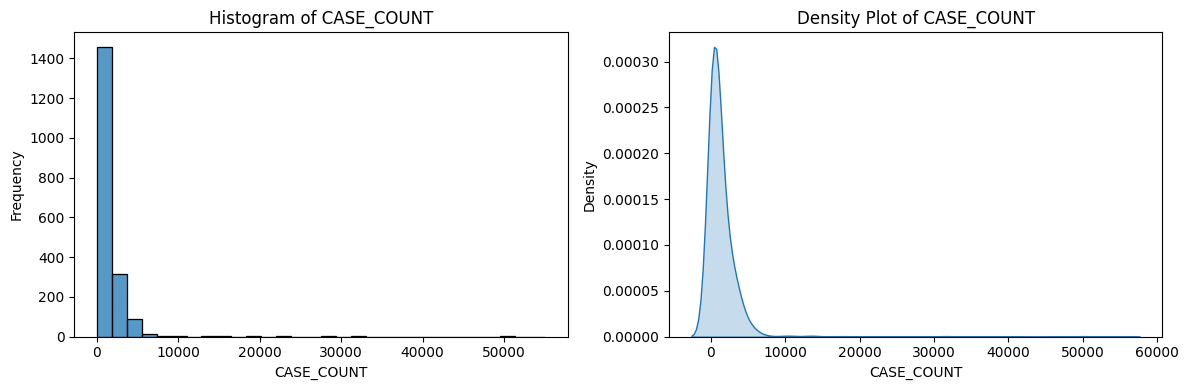

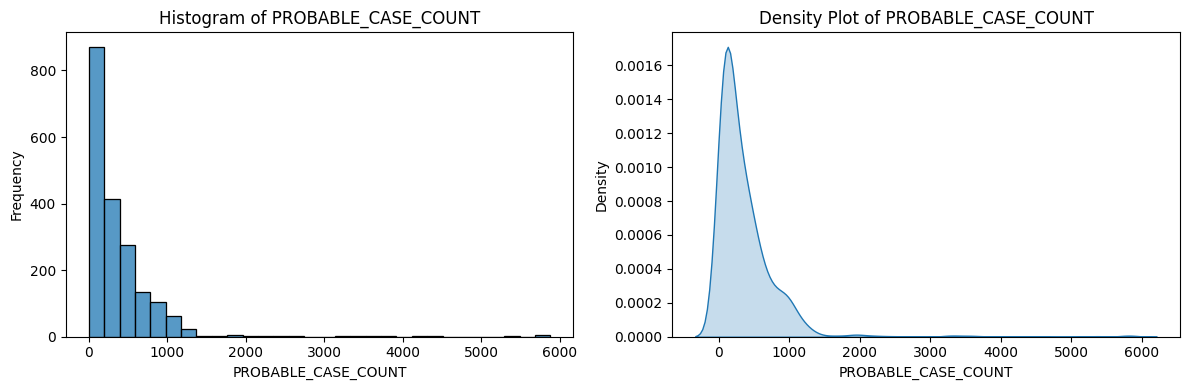

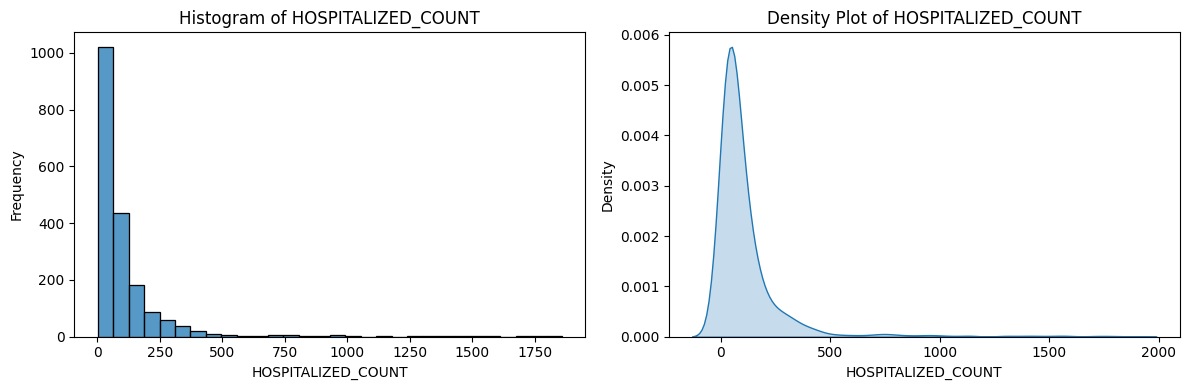

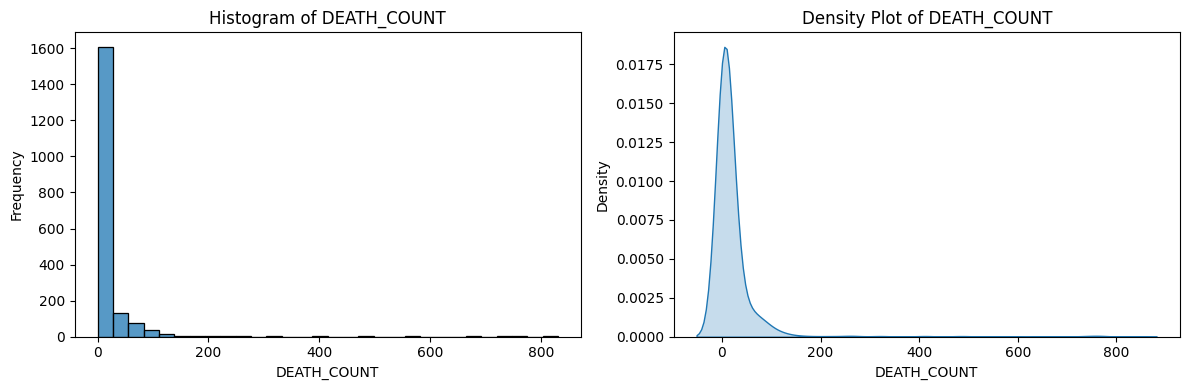

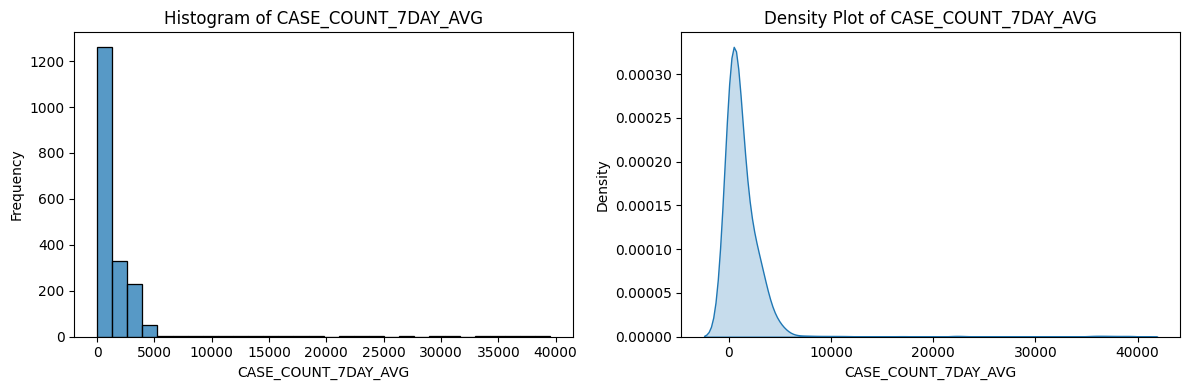

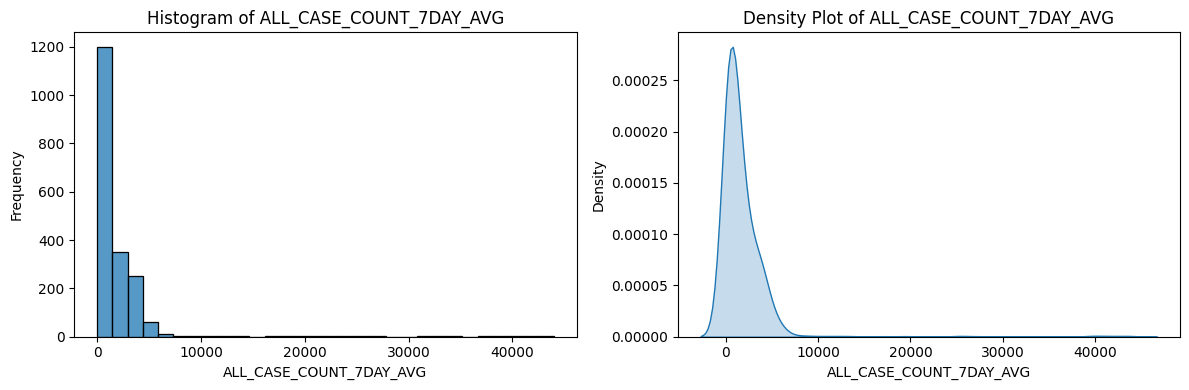

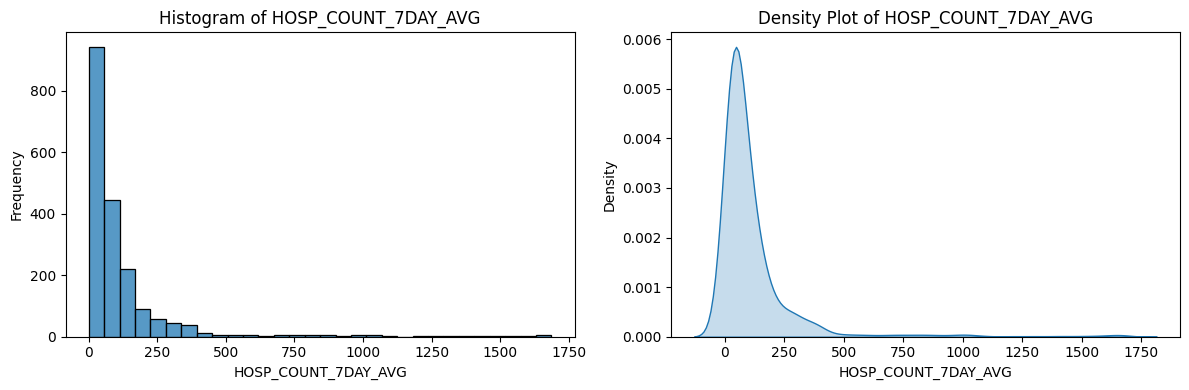

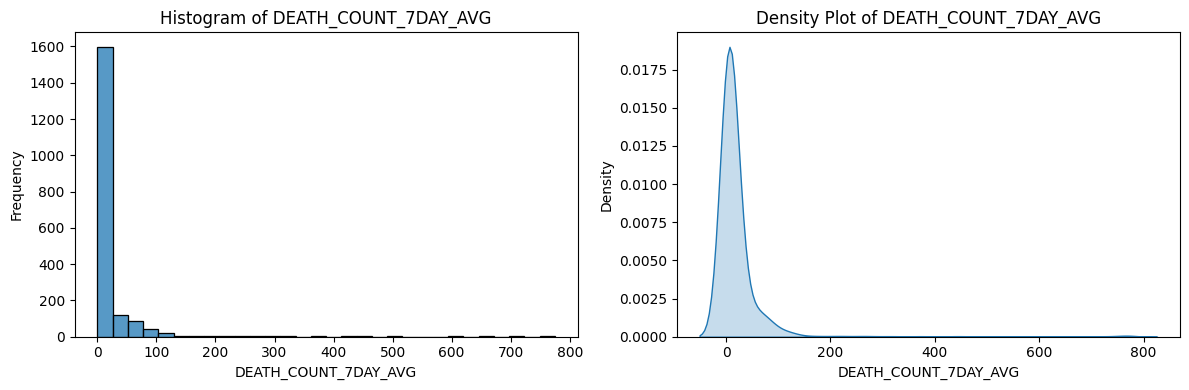

In [ ]:
cols = [
    'CASE_COUNT',
    'PROBABLE_CASE_COUNT',
    'HOSPITALIZED_COUNT',
    'DEATH_COUNT',
    'CASE_COUNT_7DAY_AVG',
    'ALL_CASE_COUNT_7DAY_AVG',
    'HOSP_COUNT_7DAY_AVG',
    'DEATH_COUNT_7DAY_AVG'
]

for col in cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # Histograma
    sns.histplot(covid_df[col], bins=30, ax=axes[0], kde=False)
    axes[0].set_title(f"Histogram of {col}")
    axes[0].set_xlabel(col)
    axes[0].set_ylabel("Frequency")
    
    # Gráfico de densidad
    sns.kdeplot(covid_df[col], ax=axes[1], fill=True)
    axes[1].set_title(f"Density Plot of {col}")
    axes[1].set_xlabel(col)
    
    plt.tight_layout()
    plt.show()

# ***CORRELATION MATRIX***

/workspaces/COVID_DAILY_COUNTS/.venv/lib/python3.12/site-packages/dython/nominal.py:176: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False (or cramers_v_bias_correction=False if calling from associations)
  warnings.warn(
/workspaces/COVID_DAILY_COUNTS/.venv/lib/python3.12/site-packages/dython/nominal.py:176: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False (or cramers_v_bias_correction=False if calling from associations)
  warnings.warn(
/workspaces/COVID_DAILY_COUNTS/.venv/lib/python3.12/site-packages/dython/nominal.py:176: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False (or cramers_v_bias_correction=False if calling from associations)
  warnings.warn(
/workspaces/COVID_DAILY_COUNTS/.venv/lib/python3.12/site-packages/dython/nominal.py:176: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Cons

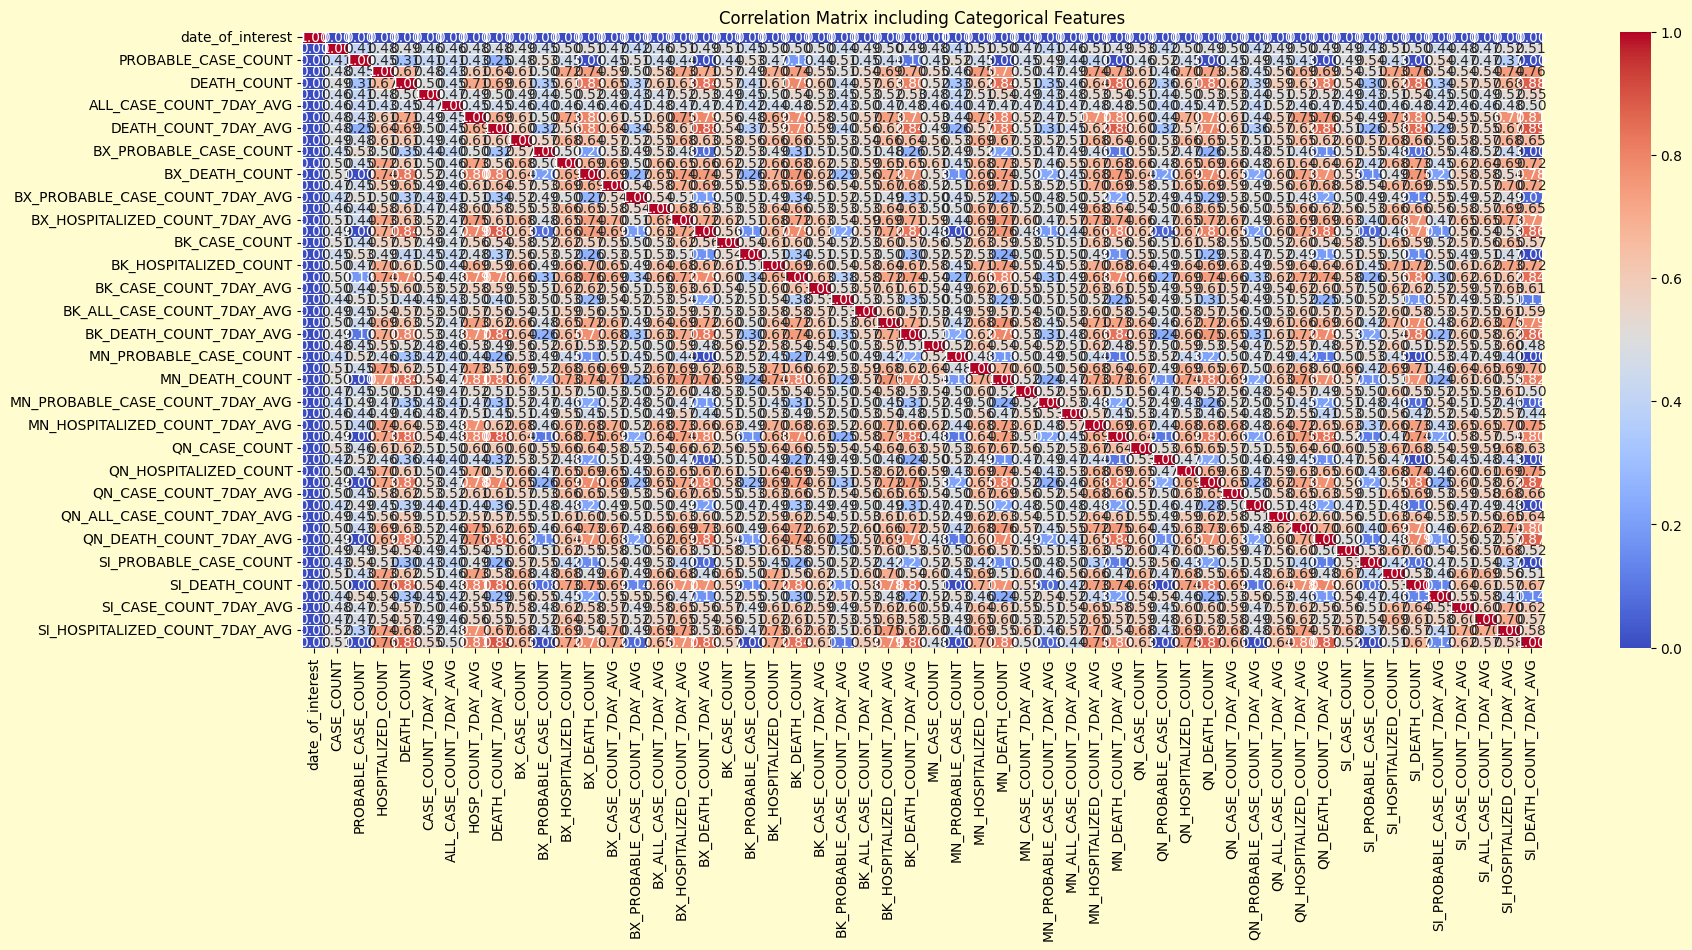

In [50]:
# Correlation matrix
associations_df = associations(covid_df, nominal_columns="all", plot=False)
corr_matrix = associations_df["corr"]

# Heatmap
plt.figure(figsize=(20, 8))
plt.gcf().set_facecolor("#FFFDD0")  # Set background color to cream
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix including Categorical Features")
plt.show()

In [69]:
# Seleccionar solo columnas numéricas
numeric_cols = covid_df.select_dtypes(include=["int", "float"]).columns.tolist()

# Excluir la variable objetivo del análisis de redundancia
target = "DEATH_COUNT"
features = [col for col in numeric_cols if col != target]

In [70]:
# Calcular matriz de correlación
corr_matrix = covid_df[numeric_cols].corr()

# Correlaciones absolutas con la variable objetivo
correlations_with_target = corr_matrix[target].drop(target).abs().sort_values(ascending=False)

In [71]:
correlations_with_target

QN_DEATH_COUNT                     0.995999
BK_DEATH_COUNT                     0.995165
BX_DEATH_COUNT                     0.991495
MN_DEATH_COUNT                     0.983629
DEATH_COUNT_7DAY_AVG               0.976384
BK_DEATH_COUNT_7DAY_AVG            0.975959
BX_DEATH_COUNT_7DAY_AVG            0.974754
QN_DEATH_COUNT_7DAY_AVG            0.974649
MN_DEATH_COUNT_7DAY_AVG            0.971767
SI_DEATH_COUNT_7DAY_AVG            0.946763
SI_DEATH_COUNT                     0.928878
QN_HOSPITALIZED_COUNT_7DAY_AVG     0.896912
HOSP_COUNT_7DAY_AVG                0.857064
BK_HOSPITALIZED_COUNT_7DAY_AVG     0.838943
BX_HOSPITALIZED_COUNT_7DAY_AVG     0.836481
MN_HOSPITALIZED_COUNT_7DAY_AVG     0.815341
QN_HOSPITALIZED_COUNT              0.810533
SI_HOSPITALIZED_COUNT_7DAY_AVG     0.783067
HOSPITALIZED_COUNT                 0.776764
BX_HOSPITALIZED_COUNT              0.757834
BK_HOSPITALIZED_COUNT              0.753440
MN_HOSPITALIZED_COUNT              0.728593
SI_HOSPITALIZED_COUNT           

In [86]:
# Filtrar columnas poco correlacionadas con el target
irrelevant_features = correlations_with_target[correlations_with_target <= 0.1].index.tolist()
print("🔻 Features con poca correlación con la variable objetivo:")
print(irrelevant_features)

🔻 Features con poca correlación con la variable objetivo:
['QN_PROBABLE_CASE_COUNT_7DAY_AVG', 'BX_PROBABLE_CASE_COUNT_7DAY_AVG', 'BK_PROBABLE_CASE_COUNT', 'QN_PROBABLE_CASE_COUNT', 'BX_PROBABLE_CASE_COUNT', 'PROBABLE_CASE_COUNT', 'MN_PROBABLE_CASE_COUNT_7DAY_AVG', 'SI_PROBABLE_CASE_COUNT_7DAY_AVG', 'MN_PROBABLE_CASE_COUNT', 'SI_PROBABLE_CASE_COUNT']


In [73]:
# Detectar pares de features redundantes entre sí
redundant_pairs = []
threshold = 0.8

for f1, f2 in combinations(features, 2):
    corr_value = corr_matrix.loc[f1, f2]
    if abs(corr_value) >= threshold and abs(corr_value) < 1.0:
        redundant_pairs.append((f1, f2, round(corr_value, 3)))

In [74]:
# Mostrar redundancias
redundant_df = pd.DataFrame(redundant_pairs, columns=["feature_1", "feature_2", "correlation"])
redundant_df

,feature_1,feature_2,correlation
0,CASE_COUNT,PROBABLE_CASE_COUNT,0.909
1,CASE_COUNT,CASE_COUNT_7DAY_AVG,0.911
2,CASE_COUNT,ALL_CASE_COUNT_7DAY_AVG,0.911
3,CASE_COUNT,BX_CASE_COUNT,0.987
4,CASE_COUNT,BX_PROBABLE_CASE_COUNT,0.926
...,...,...,...
513,SI_PROBABLE_CASE_COUNT,SI_PROBABLE_CASE_COUNT_7DAY_AVG,0.923
514,SI_HOSPITALIZED_COUNT,SI_HOSPITALIZED_COUNT_7DAY_AVG,0.947
515,SI_DEATH_COUNT,SI_DEATH_COUNT_7DAY_AVG,0.929
516,SI_PROBABLE_CASE_COUNT_7DAY_AVG,SI_ALL_CASE_COUNT_7DAY_AVG,0.831


In [75]:
# Eliminar la segunda variable de cada par redundante
columns_to_drop = redundant_df["feature_2"].unique().tolist()
print("🗑️ Columnas redundantes a eliminar:", len(columns_to_drop))

🗑️ Columnas redundantes a eliminar: 49


Debido a que las columnas de este df son los mismos calculos pero en los diferentes barrios de la ciudad de New York, se dejarán solo las columnas generales, para dejar este dominio de datos como general en la ciudad.

In [76]:
# Mostrar las columnas
print(covid_df.columns.tolist())

['date_of_interest', 'CASE_COUNT', 'PROBABLE_CASE_COUNT', 'HOSPITALIZED_COUNT', 'DEATH_COUNT', 'CASE_COUNT_7DAY_AVG', 'ALL_CASE_COUNT_7DAY_AVG', 'HOSP_COUNT_7DAY_AVG', 'DEATH_COUNT_7DAY_AVG', 'BX_CASE_COUNT', 'BX_PROBABLE_CASE_COUNT', 'BX_HOSPITALIZED_COUNT', 'BX_DEATH_COUNT', 'BX_CASE_COUNT_7DAY_AVG', 'BX_PROBABLE_CASE_COUNT_7DAY_AVG', 'BX_ALL_CASE_COUNT_7DAY_AVG', 'BX_HOSPITALIZED_COUNT_7DAY_AVG', 'BX_DEATH_COUNT_7DAY_AVG', 'BK_CASE_COUNT', 'BK_PROBABLE_CASE_COUNT', 'BK_HOSPITALIZED_COUNT', 'BK_DEATH_COUNT', 'BK_CASE_COUNT_7DAY_AVG', 'BK_PROBABLE_CASE_COUNT_7DAY_AVG', 'BK_ALL_CASE_COUNT_7DAY_AVG', 'BK_HOSPITALIZED_COUNT_7DAY_AVG', 'BK_DEATH_COUNT_7DAY_AVG', 'MN_CASE_COUNT', 'MN_PROBABLE_CASE_COUNT', 'MN_HOSPITALIZED_COUNT', 'MN_DEATH_COUNT', 'MN_CASE_COUNT_7DAY_AVG', 'MN_PROBABLE_CASE_COUNT_7DAY_AVG', 'MN_ALL_CASE_COUNT_7DAY_AVG', 'MN_HOSPITALIZED_COUNT_7DAY_AVG', 'MN_DEATH_COUNT_7DAY_AVG', 'QN_CASE_COUNT', 'QN_PROBABLE_CASE_COUNT', 'QN_HOSPITALIZED_COUNT', 'QN_DEATH_COUNT', 'QN_CASE

In [ ]:
columnas_df = [
    'date_of_interest',
    'CASE_COUNT',
    'PROBABLE_CASE_COUNT',
    'HOSPITALIZED_COUNT',
    'DEATH_COUNT',
    'CASE_COUNT_7DAY_AVG',
    'ALL_CASE_COUNT_7DAY_AVG',
    'HOSP_COUNT_7DAY_AVG',
    'DEATH_COUNT_7DAY_AVG'
]

In [78]:
covid_df = covid_df[columnas_df]
covid_df.sample(5)

,date_of_interest,CASE_COUNT,PROBABLE_CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT,CASE_COUNT_7DAY_AVG,ALL_CASE_COUNT_7DAY_AVG,HOSP_COUNT_7DAY_AVG,DEATH_COUNT_7DAY_AVG
163,2020-08-10,312,31,41,5,233,255,31,4
954,2022-10-10,1674,449,112,16,1459,1849,118,13
245,2020-10-31,403,140,48,4,608,810,51,7
1185,2023-05-29,135,86,24,4,174,262,22,2
611,2021-11-01,780,278,40,4,622,814,37,7


/workspaces/COVID_DAILY_COUNTS/.venv/lib/python3.12/site-packages/dython/nominal.py:176: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False (or cramers_v_bias_correction=False if calling from associations)
  warnings.warn(
/workspaces/COVID_DAILY_COUNTS/.venv/lib/python3.12/site-packages/dython/nominal.py:176: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False (or cramers_v_bias_correction=False if calling from associations)
  warnings.warn(
/workspaces/COVID_DAILY_COUNTS/.venv/lib/python3.12/site-packages/dython/nominal.py:176: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False (or cramers_v_bias_correction=False if calling from associations)
  warnings.warn(
/workspaces/COVID_DAILY_COUNTS/.venv/lib/python3.12/site-packages/dython/nominal.py:176: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Cons

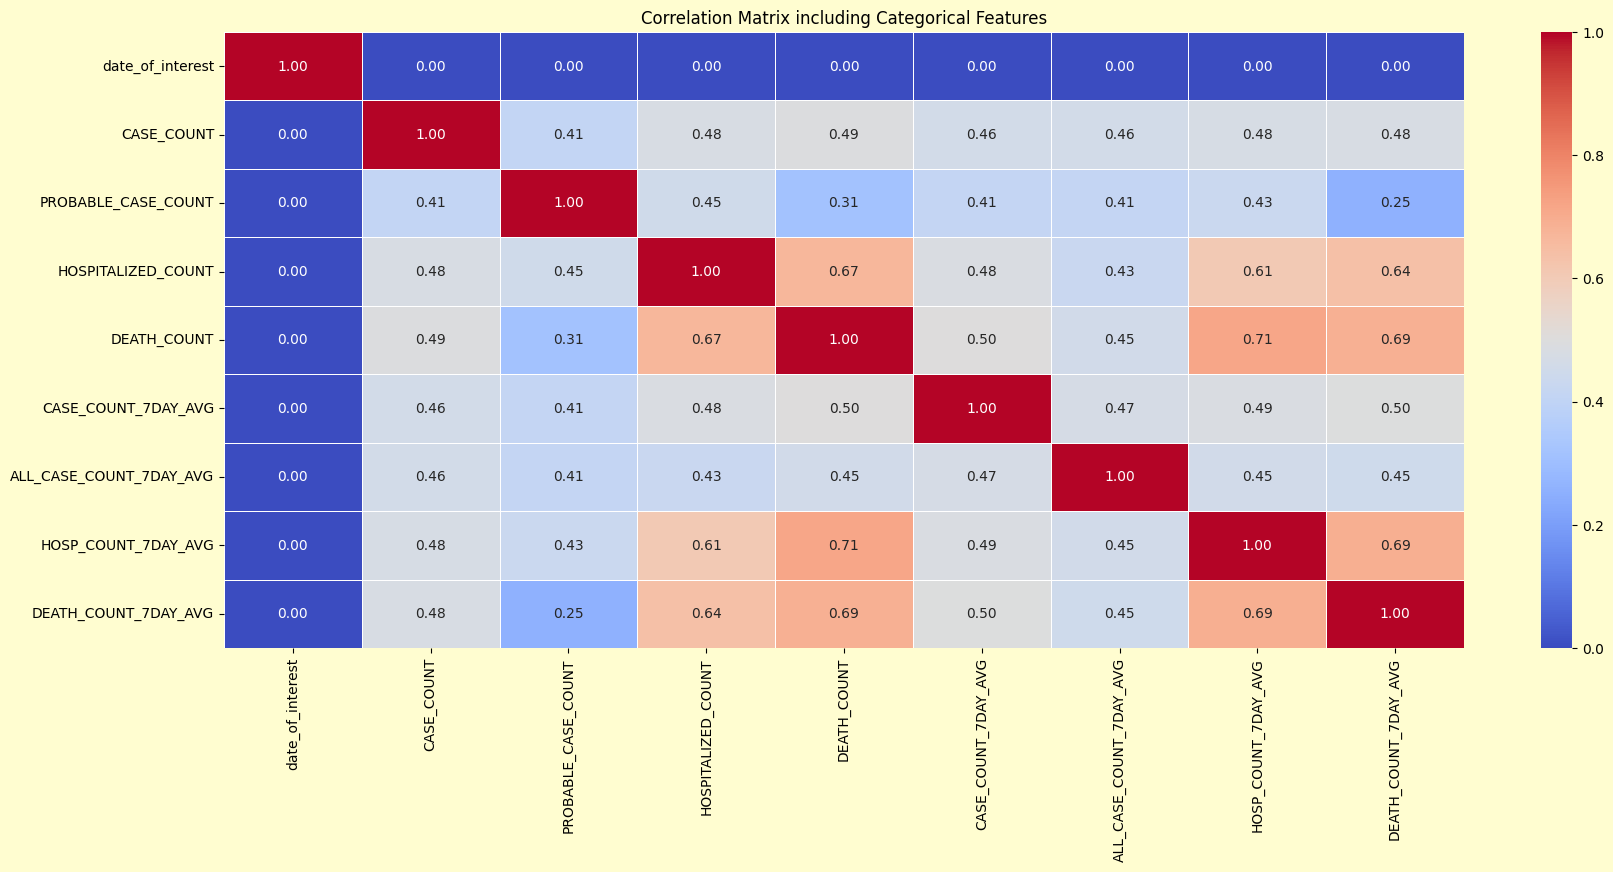

In [79]:
# Correlation matrix
associations_df = associations(covid_df, nominal_columns="all", plot=False)
corr_matrix = associations_df["corr"]

# Heatmap
plt.figure(figsize=(20, 8))
plt.gcf().set_facecolor("#FFFDD0")  # Set background color to cream
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix including Categorical Features")
plt.show()

## 🧪 ***PipeLines***

In [80]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1915 entries, 0 to 1914
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date_of_interest         1915 non-null   datetime64[ns]
 1   CASE_COUNT               1915 non-null   int64         
 2   PROBABLE_CASE_COUNT      1915 non-null   int64         
 3   HOSPITALIZED_COUNT       1915 non-null   int64         
 4   DEATH_COUNT              1915 non-null   int64         
 5   CASE_COUNT_7DAY_AVG      1915 non-null   int64         
 6   ALL_CASE_COUNT_7DAY_AVG  1915 non-null   int64         
 7   HOSP_COUNT_7DAY_AVG      1915 non-null   int64         
 8   DEATH_COUNT_7DAY_AVG     1915 non-null   int64         
dtypes: datetime64[ns](1), int64(8)
memory usage: 134.8 KB


In [ ]:
numeric_features = [
    'CASE_COUNT',
    'PROBABLE_CASE_COUNT',
    'HOSPITALIZED_COUNT',
    'CASE_COUNT_7DAY_AVG',
    'ALL_CASE_COUNT_7DAY_AVG',
    'HOSP_COUNT_7DAY_AVG',
    'DEATH_COUNT_7DAY_AVG'
]

In [88]:
numeric_pipe = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

In [89]:
preprocessor = ColumnTransformer(
    transformers=[
        ("numeric", numeric_pipe, numeric_features),
    ]
)

In [90]:
preprocessor

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['CASE_COUNT', 'PROBABLE_CASE_COUNT',
                                  'HOSPITALIZED_COUNT', 'CASE_COUNT_7DAY_AVG',
                                  'ALL_CASE_COUNT_7DAY_AVG',
                                  'HOSP_COUNT_7DAY_AVG',
                                  'DEATH_COUNT_7DAY_AVG'])])

***Example of the data preprocessing pipeline***

***Train / Test split***

In [91]:
X_features = covid_df.drop("DEATH_COUNT", axis="columns")
Y_target = covid_df["DEATH_COUNT"]

# 80% train, 20% test
x_train, x_test, y_train, y_test = train_test_split(
    X_features, Y_target, test_size=0.2, random_state=42
)

In [92]:
# Check dimensions
x_train.shape, x_test.shape

((1532, 8), (383, 8))

🛠️ ***Applying the Preprocessing Pipeline***

In [93]:
preprocessor.fit(x_train)

# Get feature names
feature_names = preprocessor.get_feature_names_out()

# Transform x_train
x_train_transformed = preprocessor.transform(x_train)

# Check shapes
print("Transformed Data Shape:", x_train_transformed.shape)
print("Number of Feature Names:", len(feature_names))

# Ensure transformation was applied correctly
if x_train_transformed.shape[1] != len(feature_names):
    print("❌ ERROR: Mismatch detected! Check preprocessing steps.")
else:
    print("✅ Shapes match. Proceeding with DataFrame conversion.")

Transformed Data Shape: (1532, 7)
Number of Feature Names: 7
✅ Shapes match. Proceeding with DataFrame conversion.


In [95]:
print("ColumnTransformer Details:")
print(preprocessor.transformers_)

ColumnTransformer Details:
[('numeric', Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())]), ['CASE_COUNT', 'PROBABLE_CASE_COUNT', 'HOSPITALIZED_COUNT', 'CASE_COUNT_7DAY_AVG', 'ALL_CASE_COUNT_7DAY_AVG', 'HOSP_COUNT_7DAY_AVG', 'DEATH_COUNT_7DAY_AVG']), ('remainder', 'drop', [0])]


In [96]:
x_train_transformed = pd.DataFrame(x_train_transformed, columns=feature_names)

In [97]:
# Display transformed data info
x_train_transformed.info()
x_train_transformed.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1532 entries, 0 to 1531
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   numeric__CASE_COUNT               1532 non-null   float64
 1   numeric__PROBABLE_CASE_COUNT      1532 non-null   float64
 2   numeric__HOSPITALIZED_COUNT       1532 non-null   float64
 3   numeric__CASE_COUNT_7DAY_AVG      1532 non-null   float64
 4   numeric__ALL_CASE_COUNT_7DAY_AVG  1532 non-null   float64
 5   numeric__HOSP_COUNT_7DAY_AVG      1532 non-null   float64
 6   numeric__DEATH_COUNT_7DAY_AVG     1532 non-null   float64
dtypes: float64(7)
memory usage: 83.9 KB


,numeric__CASE_COUNT,numeric__PROBABLE_CASE_COUNT,numeric__HOSPITALIZED_COUNT,numeric__CASE_COUNT_7DAY_AVG,numeric__ALL_CASE_COUNT_7DAY_AVG,numeric__HOSP_COUNT_7DAY_AVG,numeric__DEATH_COUNT_7DAY_AVG
581,-0.177416,-0.229170,-0.043334,-0.056157,-0.060117,-0.050592,-0.158091
503,-0.356857,-0.567854,-0.459945,-0.387582,-0.413631,-0.489302,-0.302835
441,-0.218595,-0.716874,-0.216075,-0.232917,-0.297023,-0.179624,0.420884
537,-0.237563,0.080483,-0.210995,-0.285669,-0.256432,-0.251883,-0.276518
409,-0.379568,-0.647202,-0.470106,-0.398630,-0.436018,-0.484141,-0.210725
